In [165]:
#import libraries

import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from sklearn.feature_selection import RFE
from datetime import datetime
import smtplib
import matplotlib.pyplot as plt

# Create one random seed number for reproducible results
seedNum = 888

In [166]:
#Timer
startTimeScript = datetime.now()

#inputFile = 'OnlineNewsPopularity.csv'
#xy_original = read_csv(inputFile)

inputFile = 'TrainFinal.xlsx'
xy_original = pd.read_excel(inputFile)
xy_original.columns = xy_original.columns.str.replace(' ','')
#xy_original.columns = [i.strip() for i in xy_original.columns]


In [167]:
xy_original.shape

(39643, 57)

In [168]:
xy_original

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,5.393632,0.509582,0.693647,0.596848,1.609638,1.098946,0.693647,0.001,...,0.100000,0.531216,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,2.773055
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,5.545181,0.473587,0.693647,0.583860,1.386544,0.693647,0.693647,0.001,...,0.033333,0.531216,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,2.851870
2,http://mashable.com/2013/01/07/apple-40-billio...,9,5.356591,0.454972,0.693647,0.509744,1.386544,0.693647,0.693647,0.001,...,0.100000,0.693647,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,3.176091
3,http://mashable.com/2013/01/07/astronaut-notre...,9,6.276645,0.408652,0.693647,0.510806,2.302685,0.001000,0.693647,0.001,...,0.136364,0.588342,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,3.079181
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,6.978215,0.348292,0.693647,0.433009,2.995782,2.995782,3.044570,0.001,...,0.033333,0.693647,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,2.703291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,http://mashable.com/2014/12/17/curiosity-mars-...,10,6.466146,0.462224,0.693647,0.543964,3.332240,1.098946,0.693647,0.001,...,0.033333,0.406132,-0.260031,-0.5000,-0.100000,0.000000,0.000000,0.500000,0.000000,3.113943
39639,http://mashable.com/2014/12/18/wickrx-super-se...,17,5.783828,0.458139,0.693647,0.567421,2.079567,1.098946,0.693647,0.001,...,0.100000,0.406132,-0.174722,-0.3125,-0.050000,0.144444,-0.077778,0.355556,0.077778,2.858537
39640,http://mashable.com/2014/12/19/george-clooney-...,12,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,2.708117,0.001,...,0.000000,0.001000,0.000000,0.0000,0.000000,0.454545,0.136364,0.045455,0.136364,2.810233
39641,http://mashable.com/2014/12/24/sibling-christm...,12,5.525457,0.481968,0.693647,0.511425,2.197336,0.693647,0.693647,0.001,...,0.033333,0.406132,-0.352083,-0.6000,-0.125000,0.000000,0.000000,0.500000,0.000000,3.176091


In [169]:
savevalidation_url = xy_original.iloc[38643:39643,0]

In [170]:
savevalidation_url.shape

(1000,)

In [171]:
# Dropping the two non-predictive attributes: url and timedelta
#savevalidation=xy_original.iloc[38643:39643,:]
xy_original.drop('url', axis=1, inplace=True)

In [172]:
feature_scale=[feature for feature in xy_original.columns if feature not in ['log_shares']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(xy_original[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [179]:
scaler.transform(xy_original[feature_scale])

In [183]:
data = pd.concat([xy_original[['log_shares']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(xy_original[feature_scale]), columns=feature_scale)],
                    axis=1)

In [185]:
data.to_csv('scaling.csv',index=False)

In [188]:
inputFile = 'scaled.xlsx'
xy_original = pd.read_excel(inputFile)
xy_original.columns = xy_original.columns.str.replace(' ','')

In [189]:
xy_original

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,0.476190,0.596274,0.734258,1.0,0.860248,0.281264,0.230604,0.142555,0.0,0.582024,...,0.100000,0.765493,0.650000,0.4000,0.800000,0.500000,0.406250,0.000000,0.187500,2.773055
1,0.333333,0.613032,0.682291,1.0,0.841497,0.242257,0.145478,0.142555,0.0,0.611043,...,0.033333,0.765493,0.881250,0.8750,0.900000,0.000000,0.500000,1.000000,0.000000,2.851870
2,0.333333,0.592179,0.655417,1.0,0.734493,0.242257,0.145478,0.142555,0.0,0.546334,...,0.100000,1.000000,0.533333,0.2000,0.866667,0.000000,0.500000,1.000000,0.000000,3.176091
3,0.333333,0.693911,0.588542,1.0,0.736026,0.402441,0.000000,0.142555,0.0,0.547768,...,0.136364,0.847967,0.630303,0.4000,0.833333,0.000000,0.500000,1.000000,0.000000,3.079181
4,0.523810,0.771485,0.501398,1.0,0.623707,0.523626,0.629000,0.626401,0.0,0.582331,...,0.033333,1.000000,0.779808,0.5000,0.950000,0.454545,0.568182,0.090909,0.136364,2.703291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,0.380952,0.714865,0.665887,1.0,0.783897,0.582454,0.230604,0.142555,0.0,0.607245,...,0.033333,0.584904,0.739969,0.5000,0.900000,0.000000,0.500000,1.000000,0.000000,3.113943
39639,0.714286,0.639419,0.659988,1.0,0.817762,0.363429,0.230604,0.142555,0.0,0.583391,...,0.100000,0.584904,0.825278,0.6875,0.950000,0.144444,0.461111,0.711111,0.077778,2.858537
39640,0.476190,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.557155,0.0,0.000000,...,0.000000,0.000000,1.000000,1.0000,1.000000,0.454545,0.568182,0.090909,0.136364,2.810233
39641,0.476190,0.610851,0.694391,1.0,0.736920,0.384021,0.145478,0.142555,0.0,0.623762,...,0.033333,0.584904,0.647917,0.4000,0.875000,0.000000,0.500000,1.000000,0.000000,3.176091


In [193]:
corr_matrix = pd.DataFrame(xy_original).corr().abs()

In [194]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [195]:
upper

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
n_tokens_title,NaN,0.017385,0.051859,0.044079,0.045858,0.063553,0.020131,0.020574,0.090971,0.071400,...,0.025092,0.024076,0.017063,0.029117,0.011444,0.077231,0.000235,0.146991,0.040539,0.019009
n_tokens_content,NaN,NaN,0.283720,0.822068,0.470249,0.614300,0.341923,0.265817,0.007124,0.768762,...,0.042206,0.698611,0.339183,0.513247,0.022470,0.029483,0.002941,0.026686,0.018189,0.022887
n_unique_tokens,NaN,NaN,NaN,0.749489,0.948020,0.137084,0.128284,0.217297,0.018359,0.722210,...,0.397130,0.294348,0.252624,0.024160,0.326014,0.012820,0.024446,0.000408,0.022715,0.041983
n_non_stop_words,NaN,NaN,NaN,NaN,0.831730,0.466762,0.305766,0.076268,0.026854,0.943846,...,0.234534,0.619193,0.356075,0.315087,0.197520,0.031323,0.009217,0.017803,0.028599,0.034149
n_non_stop_unique_tokens,NaN,NaN,NaN,NaN,NaN,0.193074,0.150428,0.232419,0.000395,0.770985,...,0.311373,0.410946,0.284212,0.143576,0.256535,0.033647,0.030165,0.013622,0.040223,0.057894
num_hrefs,NaN,NaN,NaN,NaN,NaN,NaN,0.415456,0.347375,0.032110,0.503249,...,0.035370,0.475419,0.252749,0.354145,0.003563,0.020863,0.031251,0.017597,0.037868,0.079334
num_self_hrefs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246530,0.103283,0.264260,...,0.000454,0.253717,0.122671,0.134296,0.030048,0.012083,0.016604,0.010033,0.010127,0.039063
num_imgs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144329,0.092376,...,0.039741,0.204498,0.098954,0.187440,0.056948,0.052464,0.047526,0.005396,0.062741,0.099711
num_videos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062093,...,0.006460,0.076635,0.112810,0.119838,0.006103,0.073329,0.017281,0.020435,0.064610,0.059640
average_token_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.222218,0.553793,0.324555,0.278804,0.194668,0.040403,0.016717,0.026595,0.036950,0.045290


In [196]:
to_drop=[column for column in upper.columns if any(upper[column]>0.95)]

In [197]:
xy_original = pd.DataFrame(xy_original).drop(pd.DataFrame(xy_original)[to_drop], axis=1)

In [198]:
xy_original.shape

(39643, 55)

In [200]:
savevalidation=xy_original.iloc[38643:39643,:]

In [201]:
savevalidation.shape

(1000, 55)

In [202]:
xy_original[:-1000]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
0,0.476190,0.596274,0.734258,1.0,0.860248,0.281264,0.230604,0.142555,0.000000,0.582024,...,0.100000,0.765493,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,2.773055
1,0.333333,0.613032,0.682291,1.0,0.841497,0.242257,0.145478,0.142555,0.000000,0.611043,...,0.033333,0.765493,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,2.851870
2,0.333333,0.592179,0.655417,1.0,0.734493,0.242257,0.145478,0.142555,0.000000,0.546334,...,0.100000,1.000000,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,3.176091
3,0.333333,0.693911,0.588542,1.0,0.736026,0.402441,0.000000,0.142555,0.000000,0.547768,...,0.136364,0.847967,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,3.079181
4,0.523810,0.771485,0.501398,1.0,0.623707,0.523626,0.629000,0.626401,0.000000,0.582331,...,0.033333,1.000000,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,2.703291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38638,0.428571,0.646662,0.612580,1.0,0.752519,0.402441,0.436565,0.142555,0.153213,0.562470,...,0.100000,0.807319,0.740000,0.500,0.875000,0.100000,0.500000,0.800000,0.000000,3.255273
38639,0.476190,0.640772,0.762346,1.0,0.914591,0.402441,0.436565,0.285161,0.860653,0.547842,...,0.136364,0.765493,0.788889,0.600,0.900000,0.300000,1.000000,0.400000,1.000000,3.278754
38640,0.380952,0.673668,0.600550,1.0,0.717275,0.562640,0.145478,0.527706,0.153213,0.631338,...,0.136364,0.584904,0.643561,0.200,0.833333,0.454545,0.568182,0.090909,0.136364,3.278754
38641,0.190476,0.721538,0.622399,1.0,0.759250,0.419104,0.145478,0.142555,0.000000,0.618672,...,0.062500,0.584904,0.794754,0.500,0.987500,0.000000,0.500000,1.000000,0.000000,3.041393


In [204]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

In [205]:
# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

# Standardize the class column to the name of targetVar if the column name is known
xy_original.rename(columns={'log_shares': 'targetVar'}, inplace=True)

In [206]:
# We create training datasets (xy_train, x_train, y_train) for various operations
# We create validation datasets (xy_test, x_test, y_test) for various operations
# Use 70% of the data to train the models and the remaining for testing/validation
#array = xy_original.values

if targetCol == totCol :
    x_original = xy_original.iloc[:,0:totAttr]
    y_original = xy_original.iloc[:,totAttr]
else :
    x_original = xy_original.iloc[:,1:totCol]
    y_original = xy_original.iloc[:,0]
    

validation_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=validation_size, random_state=seedNum)

    
#x_test = x_test.append(savevalidation.iloc[:,0:totAttr])
#y_test = y_test.append(savevalidation.iloc[:,totAttr])    
        

#saveurl_xtrain=x_train.iloc[:,0]
#saveurl_xtest=x_test.iloc[:,0]
#x_train.drop('url', axis=1, inplace=True)
#x_test.drop('url', axis=1, inplace=True)

print("x_original.shape: {} y_original.shape: {}".format(x_original.shape, y_original.shape))
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

x_original.shape: (39643, 54) y_original.shape: (39643,)
x_train.shape: (27750, 54) y_train.shape: (27750,)
x_test.shape: (11893, 54) y_test.shape: (11893,)


In [207]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [208]:
xy_original.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,targetVar
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,...,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,0.399942,0.651155,0.607461,0.970209,0.734763,0.376919,0.253766,0.229647,0.088526,0.565593,...,0.095448,0.796517,0.740469,0.478043,0.892497,0.282360,0.535714,0.683703,0.156068,3.246275
std,0.100669,0.138801,0.142026,0.170012,0.154803,0.141504,0.145432,0.200335,0.150463,0.105007,...,0.071314,0.225415,0.127721,0.290281,0.095373,0.324248,0.132727,0.377571,0.226296,0.404101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.609074,0.556607,1.000000,0.701041,0.281264,0.145478,0.142555,0.000000,0.556909,...,0.050000,0.678020,0.671616,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000,2.975891
50%,0.380952,0.665109,0.622139,1.000000,0.757387,0.384021,0.291009,0.142555,0.000000,0.579999,...,0.100000,0.847967,0.746667,0.500000,0.900000,0.150000,0.500000,1.000000,0.000000,3.146128
75%,0.476190,0.726909,0.685840,1.000000,0.811126,0.473329,0.337865,0.331076,0.153213,0.603721,...,0.100000,1.000000,0.813095,0.700000,0.950000,0.500000,0.575000,1.000000,0.250000,3.447158
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.925982


In [209]:
x_original = xy_original.drop(columns=['targetVar'])

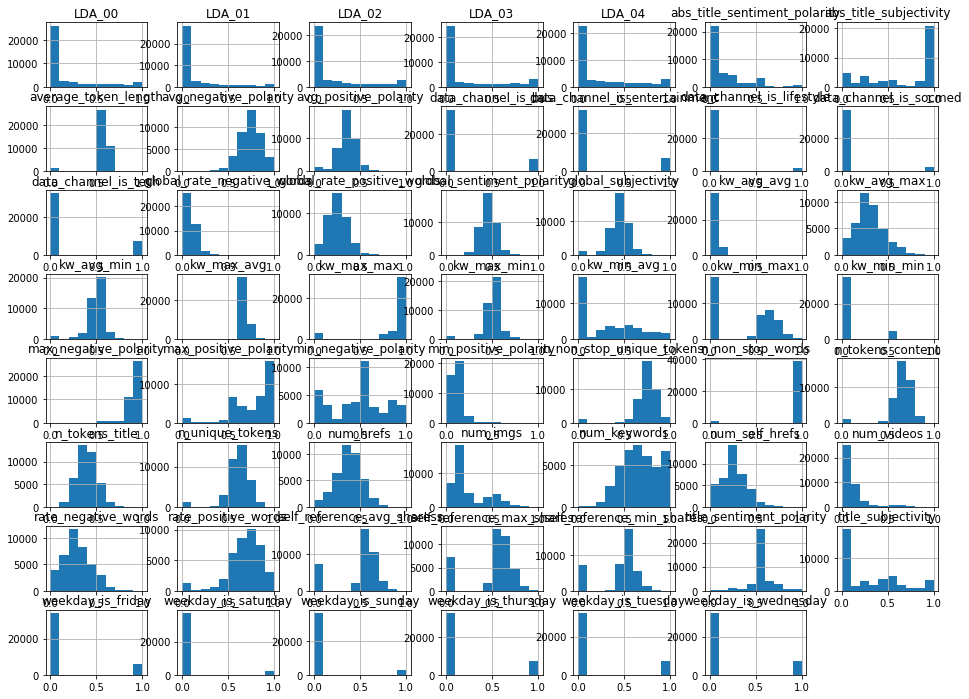

In [68]:
# Histograms for each attribute
x_original.hist()
pyplot.show()

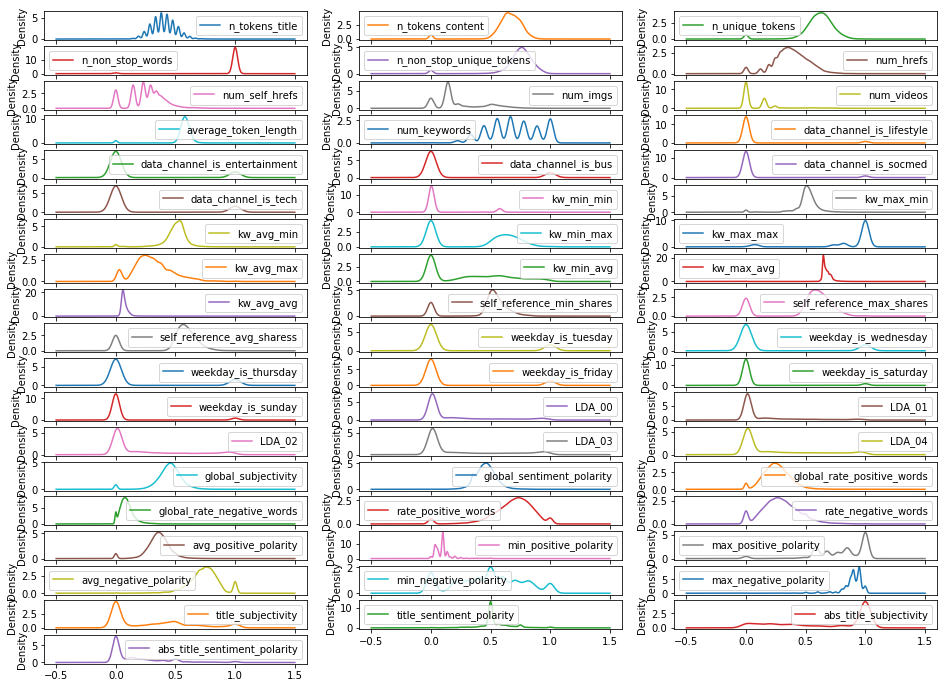

In [69]:
# Density plot for each attribute
x_original.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

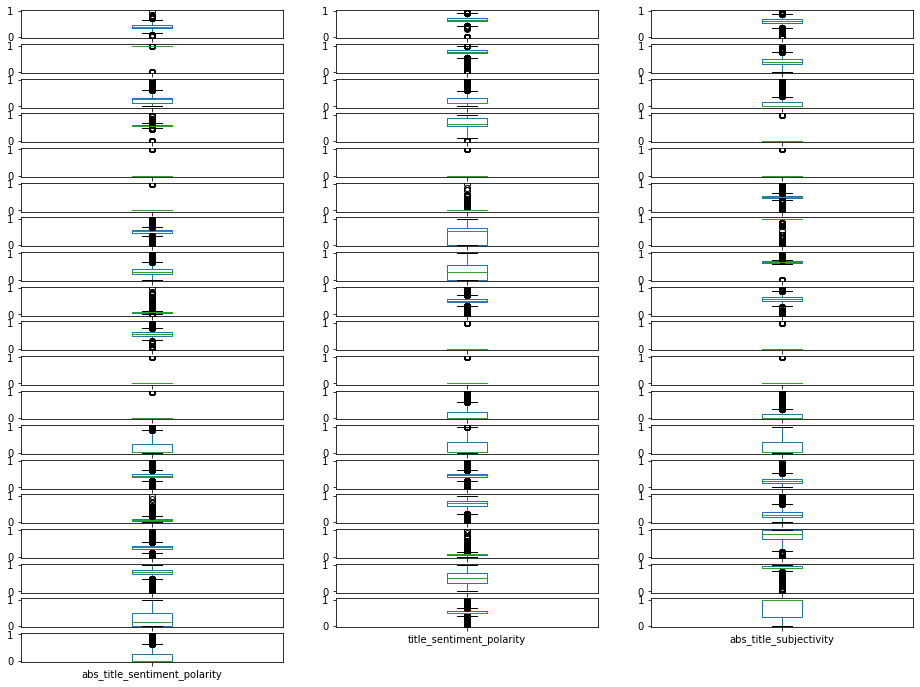

In [70]:
# Box and Whisker plot for each attribute
x_original.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

In [71]:
# Scatterplot matrix
# scatter_matrix(x_original)
# pyplot.show()

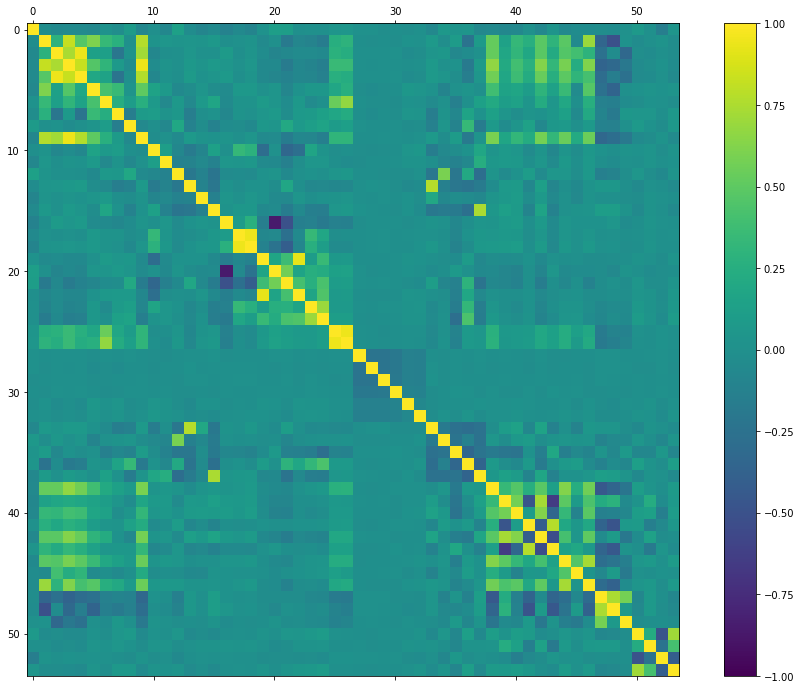

In [211]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x_original.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [214]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns', None)


In [216]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [217]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [219]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 54
selected features: 11
features with coefficients shrank to zero: 43


In [220]:
selected_feat

Index(['num_imgs', 'num_keywords', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'kw_min_avg',
       'self_reference_max_shares', 'weekday_is_saturday', 'weekday_is_sunday',
       'LDA_02', 'LDA_03'],
      dtype='object')

In [221]:
x_train=x_train[selected_feat]

In [210]:
# Feature Importance with Lasso
model = Lasso()
model.fit(x_train, y_train)

importanceScore = abs(model.coef_)
attributeList = xy_original.columns
attributeList = xy_original.columns.tolist()
if targetCol == totCol :
    del attributeList[-1]
else :
    del attributeList[0]
attributeImportance = pd.DataFrame({'attribute': attributeList, 'importance': importanceScore})
rankedAttributes = attributeImportance.sort_values('importance', ascending=False)
print(rankedAttributes)

                        attribute  importance
0                  n_tokens_title         0.0
40     global_rate_positive_words         0.0
29            weekday_is_thursday         0.0
30              weekday_is_friday         0.0
31            weekday_is_saturday         0.0
32              weekday_is_sunday         0.0
33                         LDA_00         0.0
34                         LDA_01         0.0
35                         LDA_02         0.0
36                         LDA_03         0.0
37                         LDA_04         0.0
38            global_subjectivity         0.0
39      global_sentiment_polarity         0.0
41     global_rate_negative_words         0.0
1                n_tokens_content         0.0
42            rate_positive_words         0.0
43            rate_negative_words         0.0
44          avg_positive_polarity         0.0
45          min_positive_polarity         0.0
46          max_positive_polarity         0.0
47          avg_negative_polarity 

In [142]:
# Set the importance threshold and calculate the list of attributes that don't contribute to the importance threshold
importanceSum = sum(importanceScore)
maxThreshold = 0.99
i = 0
accumWeight = 0
exit_now = False
while ((i < totAttr) and (not exit_now)) :
    accumWeight = accumWeight + (rankedAttributes.iloc[i]['importance']/importanceSum)
    if (accumWeight >= maxThreshold) :
        exit_now = True
    else :
        i = i + 1
print('Number of attributes contributed to the importance threshold:'+str(i))
lowAttributes = rankedAttributes.iloc[(i):(totAttr),]['attribute'].tolist()
print('Number of attributes found to be of low importance:',len(lowAttributes))
print(lowAttributes)

Number of attributes contributed to the importance threshold:32
Number of attributes found to be of low importance: 26
['global_sentiment_polarity', 'num_self_hrefs', 'LDA_03', 'num_keywords', 'num_hrefs', 'num_videos', 'num_imgs', 'kw_avg_avg', 'kw_min_min', 'n_tokens_content', 'kw_avg_min', 'kw_min_avg', 'kw_max_avg', 'kw_max_min', 'self_reference_min_shares', 'self_reference_avg_sharess', 'self_reference_max_shares', 'kw_min_max', 'kw_avg_max', 'kw_max_max', 'LDA_04', 'rate_positive_words', 'avg_positive_polarity', 'weekday_is_sunday', 'title_sentiment_polarity', 'global_rate_negative_words']


In [222]:
#x_test

In [225]:
# Removing the unselected attributes from the training and validation dataframes
#xy_train <- xy_train[, !(names(xy_train) %in% lowAttributes)]
#xy_test <- xy_test[, !(names(xy_test) %in% lowAttributes)]

xy_newdf = xy_original.drop(selected_feat, axis=1)

totCol = len(xy_newdf.columns)
totAttr = totCol-1
targetCol = totCol
array = xy_newdf.values

if targetCol == totCol :
    x_newdf = array[:,0:totAttr]
    y_newdf = array[:,totAttr]
else :
    x_newdf = array[:,1:totCol]
    y_newdf = array[:,0]

#validation_size = 0.30
#x_train, x_test, y_train, y_test = train_test_split(x_newdf, y_newdf, test_size=validation_size, random_state=seedNum)

x_test = x_test.append(savevalidation.iloc[:,0:totAttr])
y_test = y_test.append(savevalidation.iloc[:,totAttr])
x_test = x_test[selected_feat]

#print("x_newdf.shape: {} y_newdf.shape: {}".format(x_newdf.shape, y_newdf.shape))
#print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))
#print("x_test.shape: {} y_test.shape: {}".format(x_test.shape, y_test.shape))

In [226]:
x_test

,num_imgs,num_keywords,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,kw_min_avg,self_reference_max_shares,weekday_is_saturday,weekday_is_sunday,LDA_02,LDA_03
34178,0.142555,0.444444,0,1,0,0.584891,0.545143,0,0,0.251126,0.024019
17341,0.000000,0.888889,0,0,0,0.660111,0.629822,0,0,0.004485,0.004448
8981,0.142555,0.777778,1,0,0,0.000277,0.000000,0,0,0.562129,0.007605
35284,0.225970,0.555556,0,0,0,0.267660,0.584269,0,0,0.656275,0.016762
22490,0.285161,0.666667,0,0,0,0.000277,0.000000,0,1,0.011898,0.011505
...,...,...,...,...,...,...,...,...,...,...,...
39638,0.142555,1.000000,0,0,1,0.472282,0.613131,0,0,0.119721,0.386390
39639,0.142555,0.333333,0,1,0,0.234548,0.513261,0,0,0.035283,0.035029
39640,0.557155,0.444444,0,0,0,0.381973,0.000000,0,0,0.682698,0.024097
39641,0.142555,0.333333,0,1,0,0.858454,0.602119,0,0,0.035388,0.035139


In [227]:
print('Data handling time:',(datetime.now() - startTimeScript))

Data handling time: 0:43:34.838099


In [228]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'neg_mean_squared_error'

In [229]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge(random_state=seedNum)))
models.append(('LASSO', Lasso(random_state=seedNum)))
models.append(('EN', ElasticNet(random_state=seedNum)))
models.append(('CART', DecisionTreeRegressor(random_state=seedNum)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seedNum)))
models.append(('GBM', GradientBoostingRegressor(random_state=seedNum)))
results = []
names = []
metrics = []

In [230]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: -0.150863 (0.004986)
Model training time: 0:00:00.160569
RR: -0.150863 (0.004986)
Model training time: 0:00:00.110703


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LASSO: -0.165091 (0.005509)
Model training time: 0:00:00.137632
EN: -0.165091 (0.005509)
Model training time: 0:00:00.134639


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: -0.294727 (0.012834)
Model training time: 0:00:01.759329


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: -0.170815 (0.006142)
Model training time: 0:00:06.470309


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: -0.149790 (0.005416)
Model training time: 0:03:00.891744


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: -0.154145 (0.006416)
Model training time: 0:01:45.985575


C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: -0.145162 (0.005223)
Model training time: 0:00:33.507761


In [231]:
print('Average metrics ('+scoring+') from all models:',np.mean(metrics))
print('Average error from all models:',math.sqrt(abs(np.mean(metrics))))

Average metrics (neg_mean_squared_error) from all models: -0.17183855692650307
Average error from all models: 0.4145341444640032


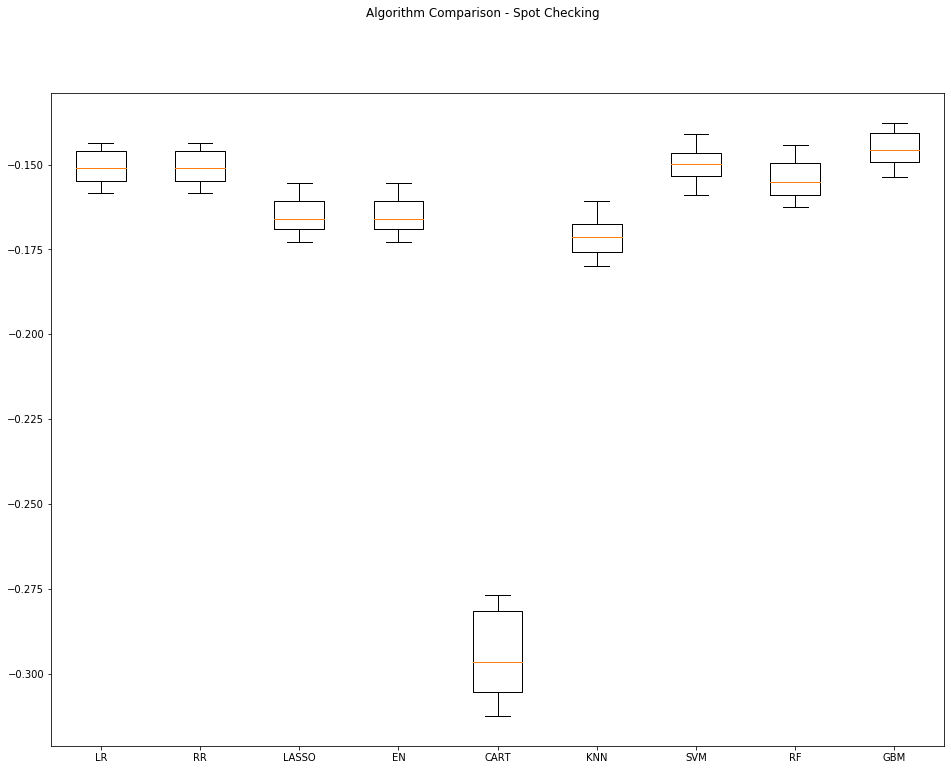

In [232]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [233]:
# Set up the comparison array
results = []
names = []

In [234]:
# Tuning algorithm #1 - ElasticNet
startTimeModule = datetime.now()
paramGrid1 = dict(alpha=np.array([1,2,3]))
model1 = ElasticNet(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('EN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -0.165091 using {'alpha': 1}
-0.165091 (0.005509) with: {'alpha': 1}
-0.165091 (0.005509) with: {'alpha': 2}
-0.165091 (0.005509) with: {'alpha': 3}
Model training time: 0:00:00.471453


In [235]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([100,200,300,400]))
model2 = GradientBoostingRegressor(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\dfgbe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -0.145109 using {'n_estimators': 200}
-0.145162 (0.005223) with: {'n_estimators': 100}
-0.145109 (0.005193) with: {'n_estimators': 200}
-0.145191 (0.005298) with: {'n_estimators': 300}
-0.145566 (0.005193) with: {'n_estimators': 400}
Model training time: 0:04:44.676921


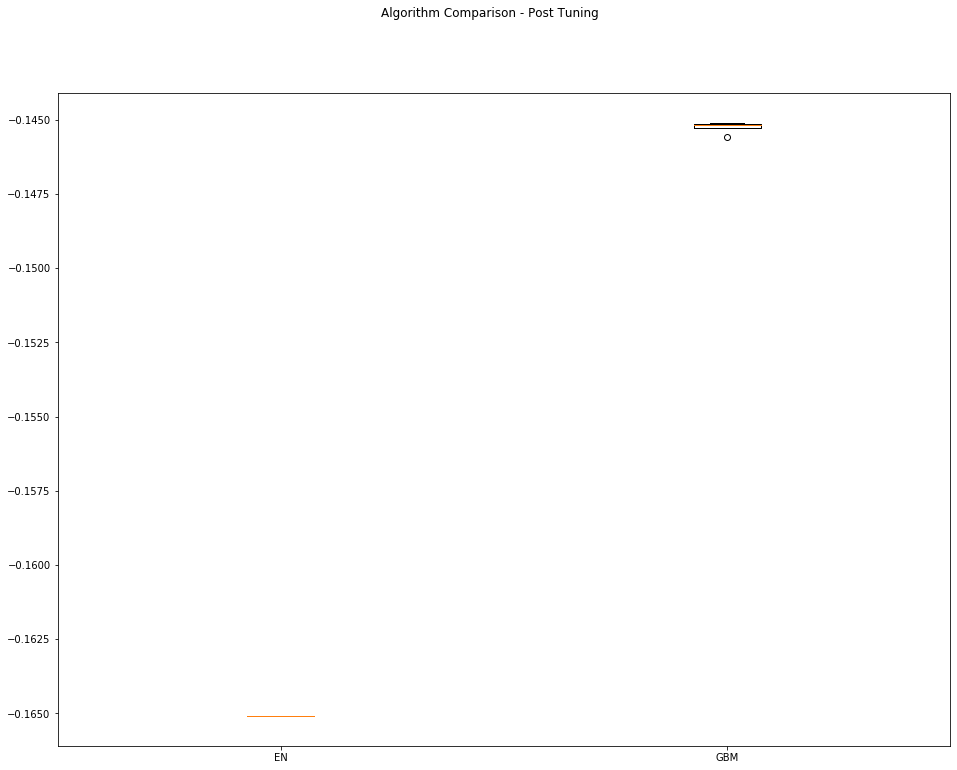

In [236]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [153]:
model = ElasticNet(alpha=1, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))

167598620.78181756


In [237]:
model = GradientBoostingRegressor(n_estimators=100, random_state=seedNum)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(mean_squared_error(y_test, predictions))

1.3964606786233582


In [154]:
startTimeModule = datetime.now()
finalModel = ElasticNet(alpha=1, random_state=seedNum)
finalModel.fit(x_original, y_original)
print('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.545511


In [238]:
startTimeModule = datetime.now()
finalModel = GradientBoostingRegressor(n_estimators=100, random_state=seedNum)
finalModel.fit(x_original, y_original)
print('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:27.840605


In [239]:
modelName = 'finalModel_BinaryClass.sav'
dump(finalModel, modelName)


print('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:59:01.082676


In [240]:
predictions

array([3.15481362, 3.29550456, 3.04186058, ..., 3.14222547, 3.24802006,
       2.98240797])

In [241]:
predictions.shape

(13893,)

In [244]:
import csv
share_count = 0

with open('sample_submission.csv', 'w', newline='') as csvfile:
    
    fieldnames = ['id','shares','url']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    
    for shares in predictions:
        share_count += 1
        thewriter.writerow({'id':share_count, 'shares':shares})
        
    for urls in savevalidation_url:
        thewriter.writerow({'url':urls})

In [245]:
savevalidation_url

38643    http://mashable.com/2013/01/10/axe-buzz-aldrin...
38644    http://mashable.com/2013/01/10/baby-clothing-i...
38645    http://mashable.com/2013/01/10/how-curiosity-r...
38646    http://mashable.com/2013/01/10/mashable-ces-pi...
38647    http://mashable.com/2013/01/11/kesha-cmon-musi...
                               ...                        
39638    http://mashable.com/2014/12/17/curiosity-mars-...
39639    http://mashable.com/2014/12/18/wickrx-super-se...
39640    http://mashable.com/2014/12/19/george-clooney-...
39641    http://mashable.com/2014/12/24/sibling-christm...
39642    http://mashable.com/2014/12/24/watching-the-in...
Name: url, Length: 1000, dtype: object